In [18]:
import scipy.io.wavfile as wavfile
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from functions import fft

In [19]:
choix_music="4"

In [20]:
#s_rate, signal = wavfile.read('./music/music1.wav')
sound = AudioSegment.from_wav('./music/music'+choix_music+'.wav')
sound = sound.set_channels(1)
sound.export('./music/music'+choix_music+'_mono.wav', format='wav')

<_io.BufferedRandom name='./music/music4_mono.wav'>

In [21]:
s_rate, signal = wavfile.read('./music/music'+str(choix_music)+'_mono.wav')
#signal = signal[0:int(len(signal)/100)]
t = np.linspace(0, signal.shape[0]/s_rate, signal.shape[0])
len(signal)

10581612

Text(0, 0.5, 'Amplitude')

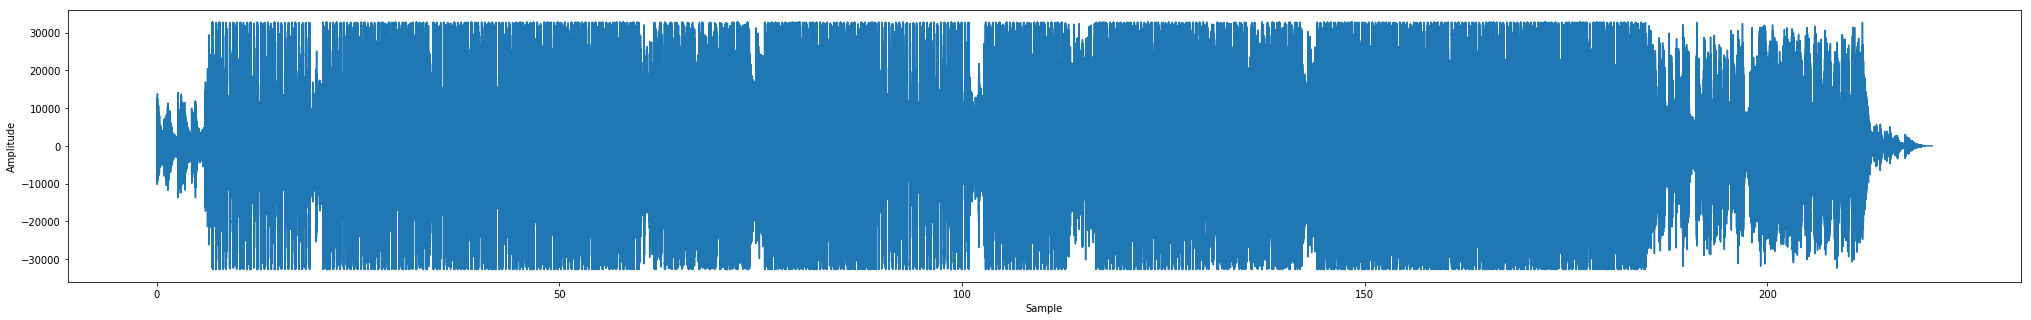

In [22]:
#tracé du signal 
fig = plt.figure(figsize=(35,5))
plt.plot(t,signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

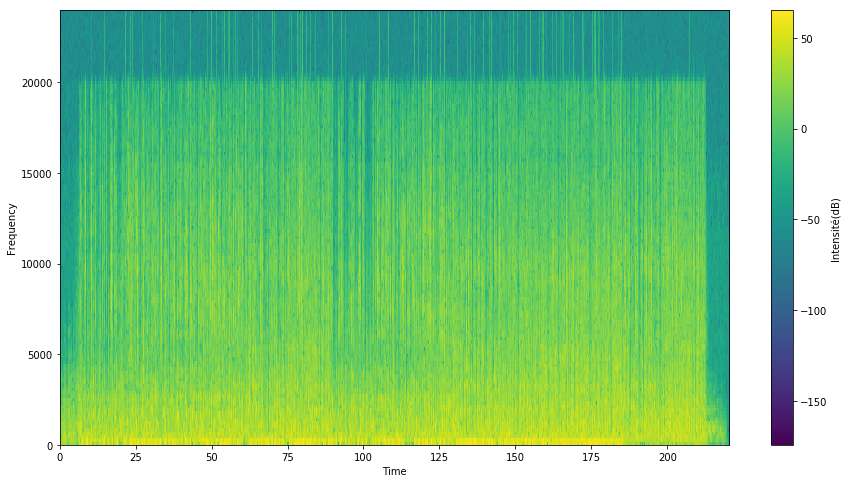

In [23]:
fig = plt.figure(figsize=(15,8))
spectrum, freqs, t, im = plt.specgram(signal,NFFT=256,Fs=s_rate,noverlap=128)
plt.xlabel('Time')
plt.ylabel('Frequency')
fig.colorbar(im).set_label('Intensité(dB)')

In [24]:
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp

def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks

In [25]:
from scipy.ndimage.morphology import (generate_binary_structure, iterate_structure, binary_erosion)

def get_2D_peaks(arr2D, plot=False, amp_min=10, size_neighborhood=20):
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.morphology.iterate_structure.html#scipy.ndimage.morphology.iterate_structure
    struct = generate_binary_structure(2, 1)
    neighborhood = iterate_structure(struct, size_neighborhood)

    # find local maxima using our fliter shape
    local_max = maximum_filter(arr2D, footprint=neighborhood) == arr2D
    background = (arr2D == 0)
    eroded_background = binary_erosion(background, structure=neighborhood,
                                       border_value=1)

    # Boolean mask of arr2D with True at peaks
    detected_peaks = local_max ^ eroded_background

    # extract peaks
    amps = arr2D[detected_peaks]
    j, i = np.where(detected_peaks)

    # filter peaks
    amps = amps.flatten()
    peaks = zip(i, j, amps)
    peaks_filtered = [x for x in peaks if x[2] > amp_min]  # freq, time, amp

    # get indices for frequency and time
    frequency_idx = [x[1] for x in peaks_filtered]
    time_idx = [x[0] for x in peaks_filtered]

    # scatter of the peaks
    if plot:
      fig, ax = plt.subplots(figsize=(25, 10))
      ax.imshow(arr2D)
      ax.scatter(time_idx, frequency_idx)
      ax.set_xlabel('Time')
      ax.set_ylabel('Frequency')
      ax.set_title("Spectrogram")
      plt.gca().invert_yaxis()
      plt.show()

    return frequency_idx, time_idx

In [26]:
y_Peaks,x_Peaks = get_2D_peaks(spectrum, plot=False, amp_min=25, size_neighborhood=20)
len(y_Peaks)

2961

In [27]:
# x_Peaks1=[]
# y_Peaks1=[]
# for i in range(len(Peaks)):
#     for j in range(len(Peaks[0])):
#         if Peaks[i][j]==1:
#             x_Peaks.append(i)
#             y_Peaks.append(j)

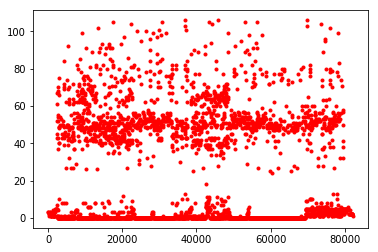

In [28]:
# y_Peaks,x_Peaks = np.where(Peaks==1)
plt.plot(x_Peaks,y_Peaks,'r.')

In [29]:
spectrum[y_Peaks[5],x_Peaks[5]]

2821269.181283633

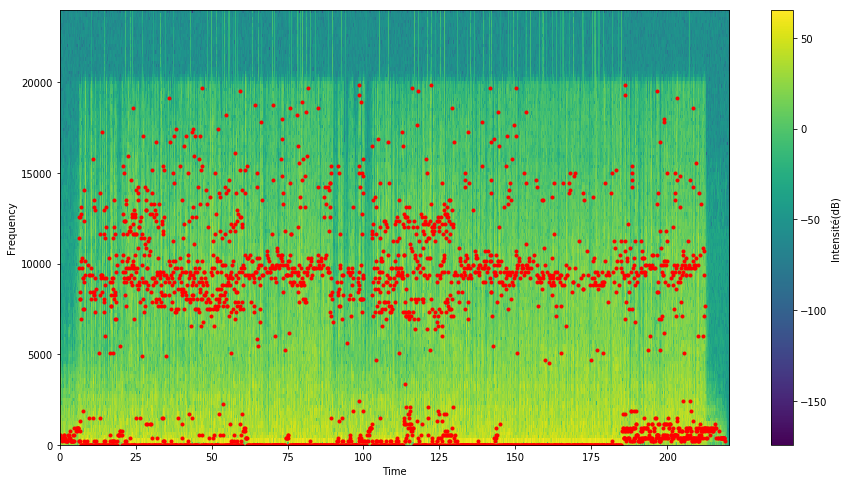

In [30]:
fig = plt.figure(figsize=(15,8))
spectrum, freqs, t, im = plt.specgram(signal,NFFT=256,Fs=s_rate,noverlap=128)
plt.xlabel('Time')
plt.ylabel('Frequency')
fig.colorbar(im).set_label('Intensité(dB)')
plt.plot(t[x_Peaks],freqs[y_Peaks],'r.')